# Introducción al curso

### Importar librerias

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(
    style='whitegrid',
    context='notebook',
    palette='Set2',
    font_scale=0.8
)

# Permite hacer un escalamiento de los datos, para que el modelo se ajuste mejor a ellos
# Minimizando los errores cuando hay valores atipicos o valores que estan muy por fuera del rango que se espera
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Tu primera regresión lineal scikit-learn

In [2]:
df = pd.read_csv('../data/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Análisis de datos para tu primera regresión lineal

Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que se recomienda empezar con el gráfico de correlaciones usando pairplor de `seaborn`

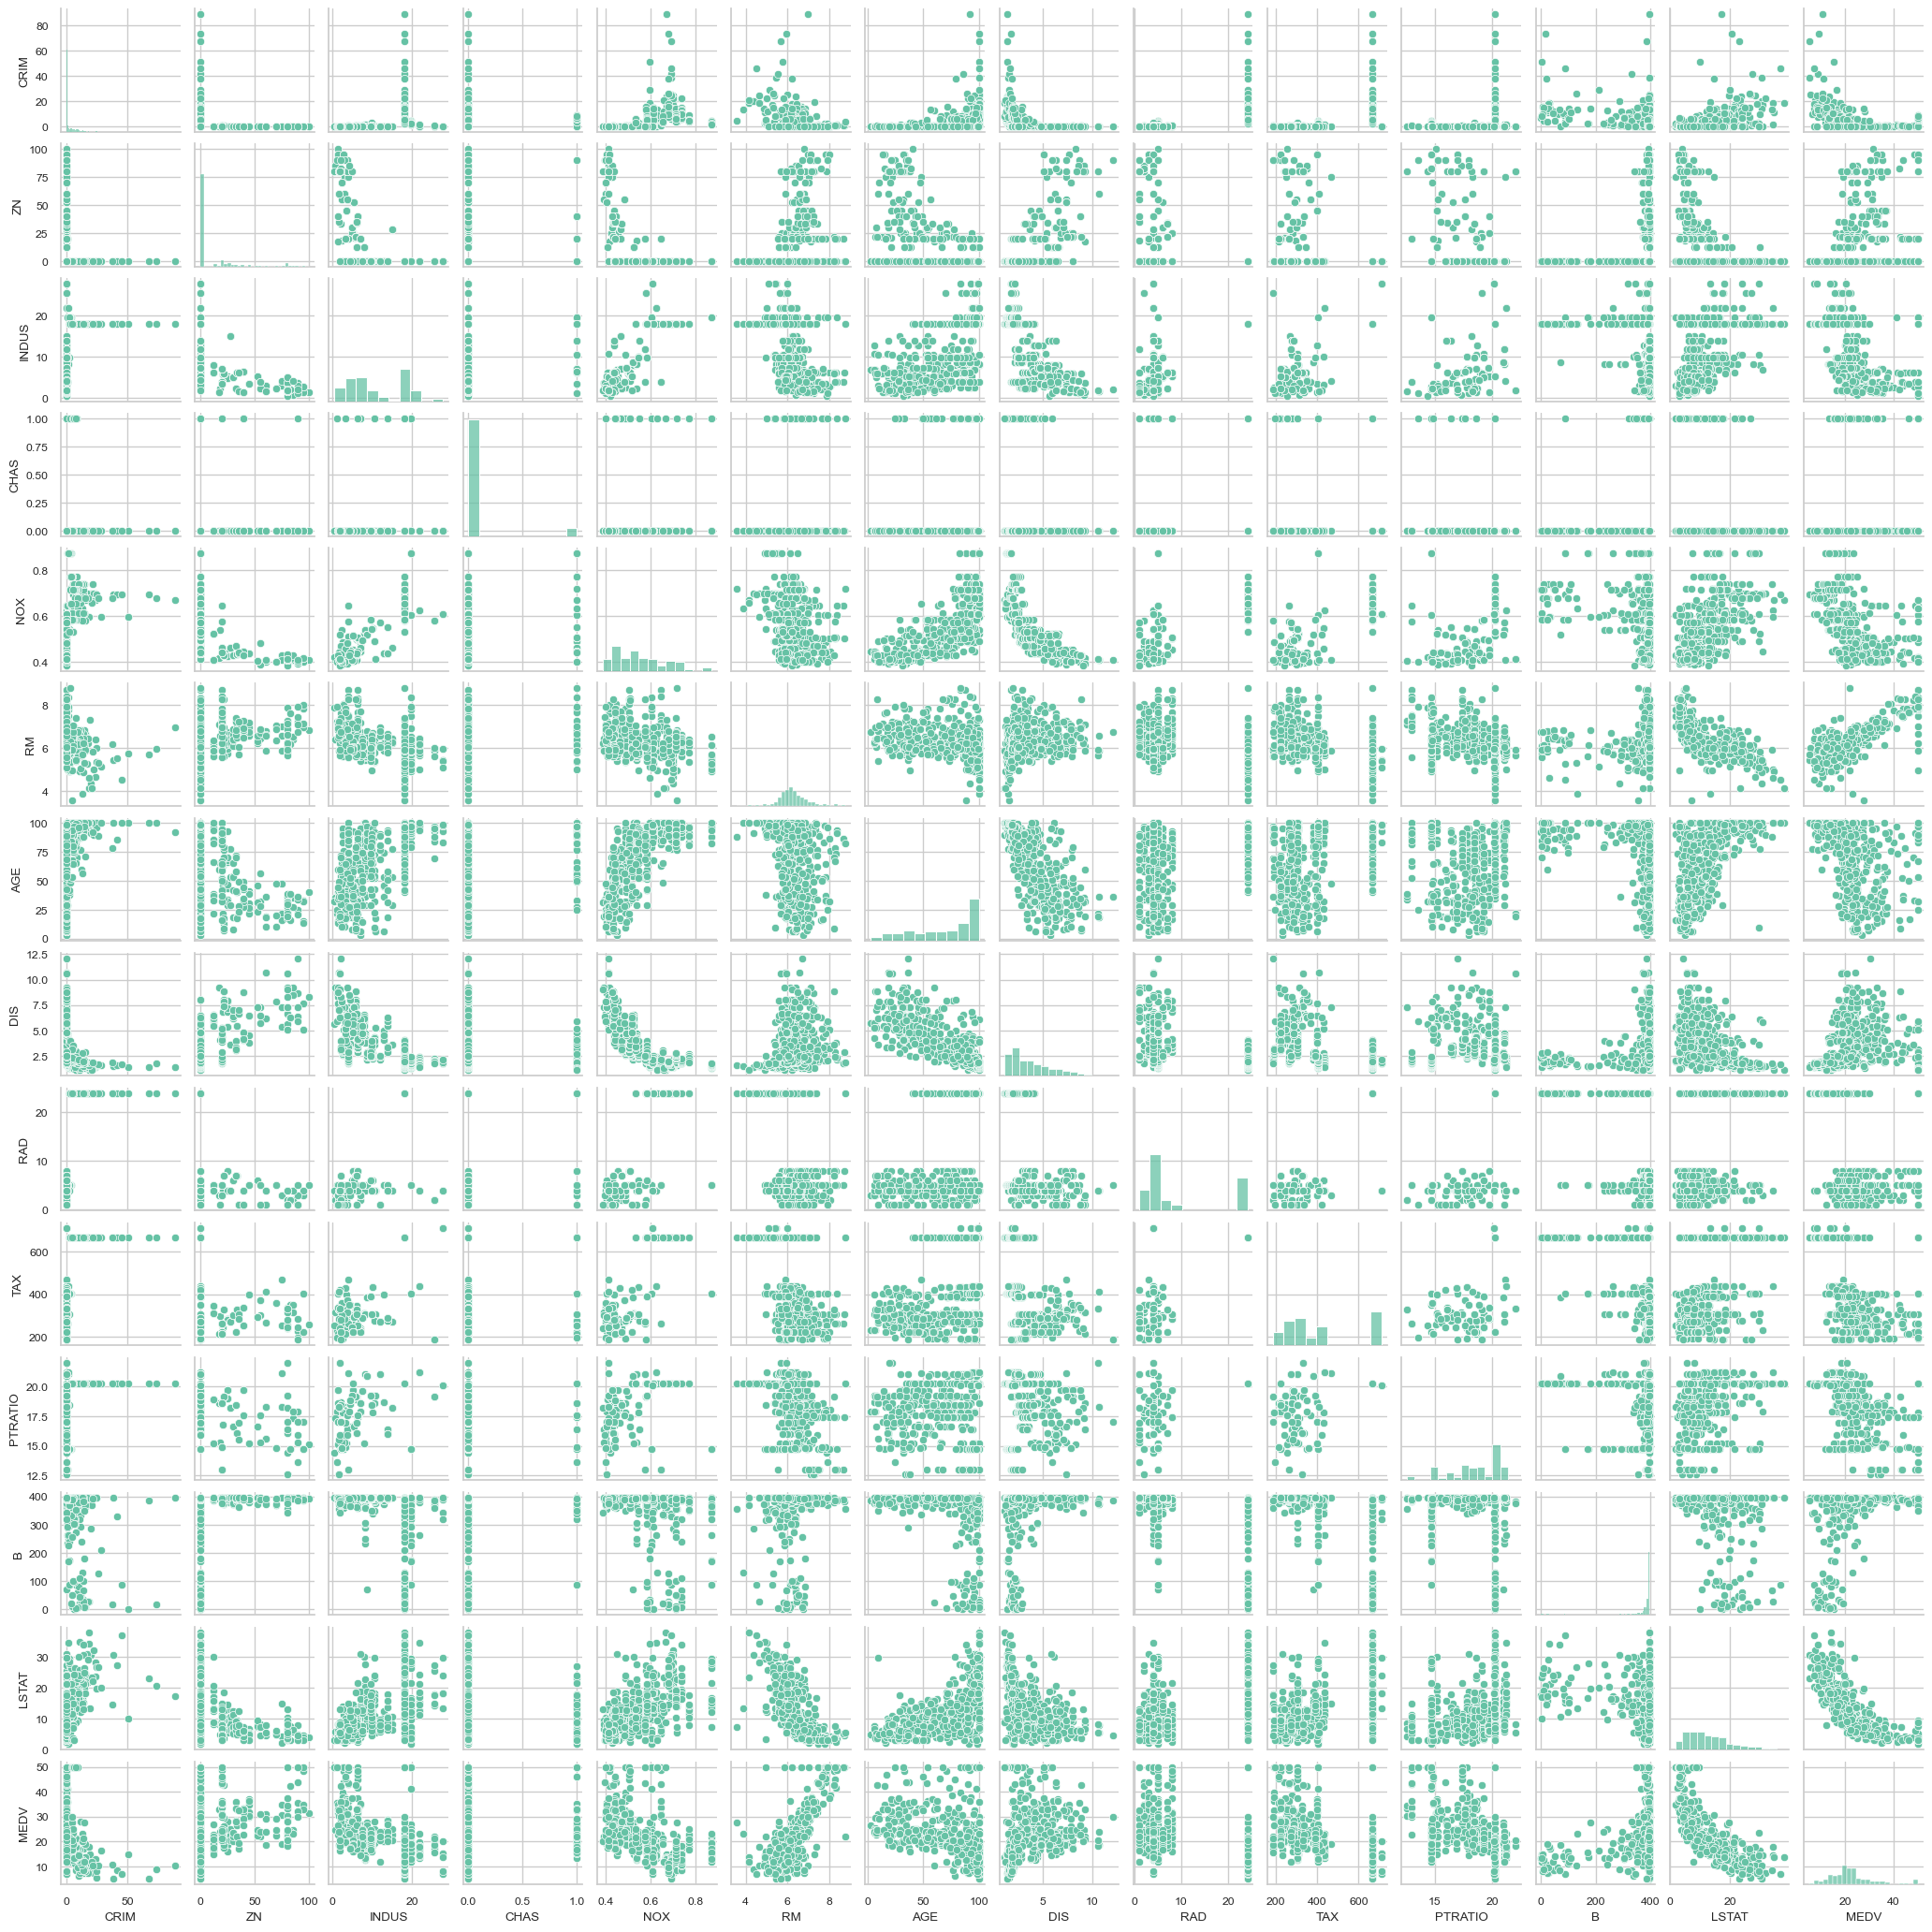

In [3]:
sns.pairplot(data=df, height=1.5)
plt.show()

Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar el método numérico para poder entender las correlaciones

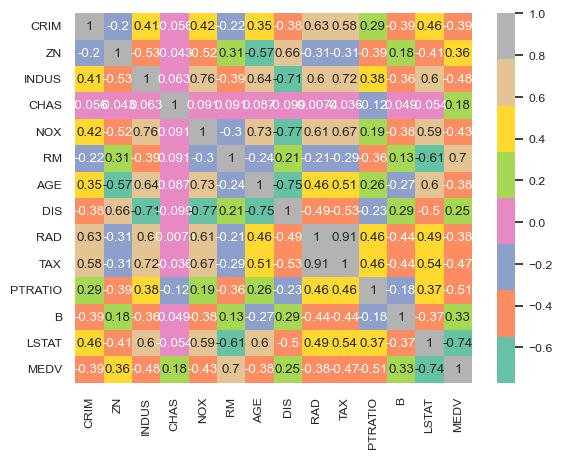

In [9]:
cm = np.corrcoef(df.values.T)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=df.columns, xticklabels=df.columns, cmap='Set2')
plt.show()

## Entrenando un modelo de regresión lineal con scikit-learn

### Creando un modelo con Sklearn

In [5]:
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values.reshape(-1,1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

### Análsis de resultados

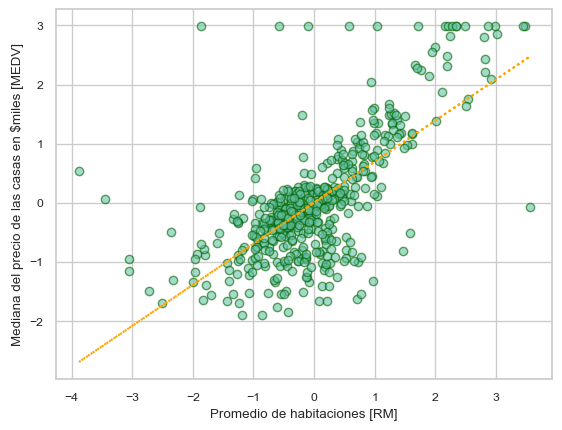

In [6]:
plt.scatter(X_std, y_std, alpha=0.6, edgecolors='darkgreen')
plt.plot(X_std, slr.predict(X_std),color='orange', linestyle=':' )
plt.ylabel('Mediana del precio de las casas en $miles [MEDV]')
plt.xlabel('Promedio de habitaciones [RM]')
plt.show()

### Generando predicción con el modelo

In [7]:
num_hab = 5
num_hab_std = sc_x.transform(np.array([num_hab]).reshape(-1,1))
slr.predict(num_hab_std)

array([[-1.2726238]])

In [8]:
print(f'El precio de una casa con 5 habitaciones en Boston es de {sc_y.inverse_transform(slr.predict(num_hab_std))} mil dolares')

El precio de una casa con 5 habitaciones en Boston es de [[10.83992413]] mil dolares
